### Importación de datos



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda2.head()


,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Silla de oficina,Muebles,283600.0,15300.0,04/08/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
1,Pandereta,Instrumentos musicales,76800.0,2300.0,26/11/2020,Blanca Ramirez,Medellín,3,Tarjeta de crédito,4,6.25184,-75.56359
2,Cama king,Muebles,443300.0,23800.0,22/10/2021,Izabela de León,Pereira,5,Tarjeta de crédito,10,4.81333,-75.69611
3,Cama king,Muebles,906200.0,46400.0,04/05/2022,Maria Alfonso,Cali,5,Tarjeta de crédito,10,3.43722,-76.52250
4,Silla de oficina,Muebles,397800.0,19400.0,26/02/2022,Lucas Olivera,Bogotá,4,Tarjeta de crédito,3,4.60971,-74.08175


#1. Análisis de facturación



In [53]:
VENTAS = tienda['Precio'].sum() / 1000000
VENTAS2 = tienda2['Precio'].sum() / 1000000
VENTAS3 = tienda3['Precio'].sum() / 1000000
VENTAS4 = tienda4['Precio'].sum() / 1000000


print(VENTAS)
print(VENTAS2)
print(VENTAS3)
print(VENTAS4)


1150.8804
1116.3435
1098.0196
1038.3757


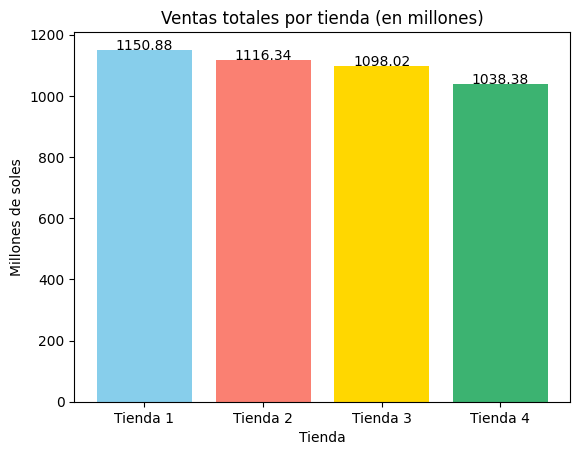

In [15]:
import matplotlib.pyplot as plt

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
ventas_totales = [VENTAS, VENTAS2, VENTAS3, VENTAS4]
colores = ['skyblue', 'salmon', 'gold', 'mediumseagreen']

plt.bar(nombres_tiendas, ventas_totales, color= colores)
plt.title('Ventas totales por tienda (en millones)')
plt.xlabel('Tienda')
plt.ylabel('Millones de soles')

for i, v in enumerate(ventas_totales):
    plt.text(i, v + 1, f"{v:.2f}", ha='center')

plt.show()



# 2. Ventas por categoría

In [22]:
ventas_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False) / 1_000_000
ventas_categoria2 = tienda2.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False) / 1_000_000
ventas_categoria3 = tienda3.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False) / 1_000_000
ventas_categoria4 = tienda4.groupby('Categoría del Producto')['Precio'].sum().sort_values(ascending=False) / 1_000_000
ventas_categoria4

,Precio
Categoría del Producto,
Electrónicos,409.4761
Electrodomésticos,283.2602
Muebles,192.5289
Instrumentos musicales,75.1024
Deportes y diversión,33.3501
Juguetes,20.2622
Artículos para el hogar,15.0745
Libros,9.3213


In [24]:
df_categorias = pd.DataFrame({
    'Tienda 1': ventas_categoria,
    'Tienda 2': ventas_categoria2,
    'Tienda 3': ventas_categoria3,
    'Tienda 4': ventas_categoria4
}).fillna(0)  # Llena los valores faltantes con 0

df_categorias = df_categorias.T  # Transponer: tiendas pasan a filas, categorías a columnas


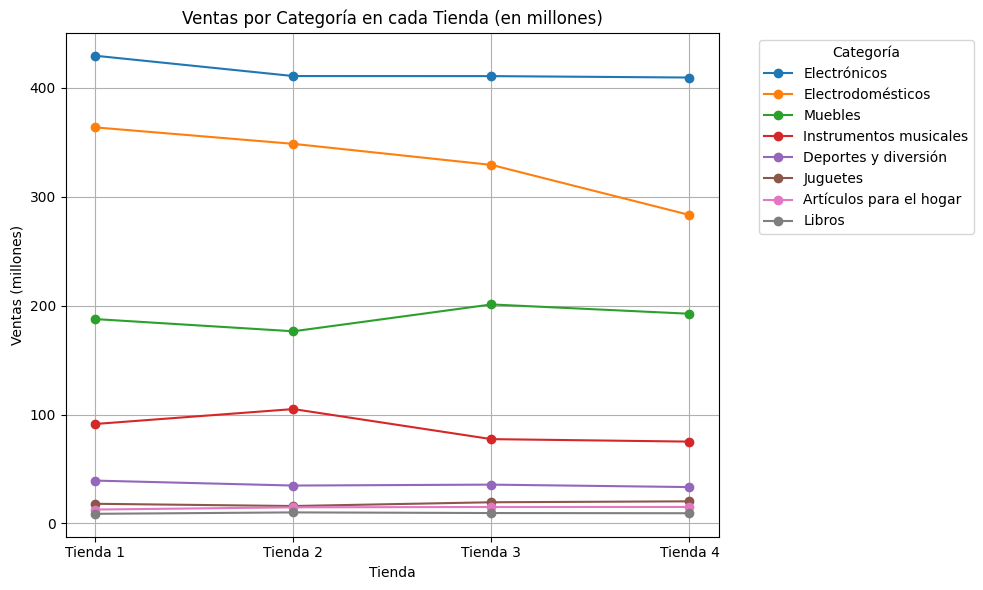

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

for categoria in df_categorias.columns:
    plt.plot(df_categorias.index, df_categorias[categoria], marker='o', label=categoria)

plt.title('Ventas por Categoría en cada Tienda (en millones)')
plt.xlabel('Tienda')
plt.ylabel('Ventas (millones)')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')  # leyenda a un lado
plt.grid(True)
plt.tight_layout()
plt.show()


# 3. Calificación promedio de la tienda


In [27]:
calificacion = tienda['Calificación'].sum()/len(tienda)
calificacion2 = tienda2['Calificación'].sum()/len(tienda2)
calificacion3 = tienda3['Calificación'].sum()/len(tienda3)
calificacion4 = tienda4['Calificación'].sum()/len(tienda4)

print(calificacion)
print(calificacion2)
print(calificacion3)
print(calificacion4)

3.976685036032217
4.037303942348453
4.048325561678677
3.9957591178965224


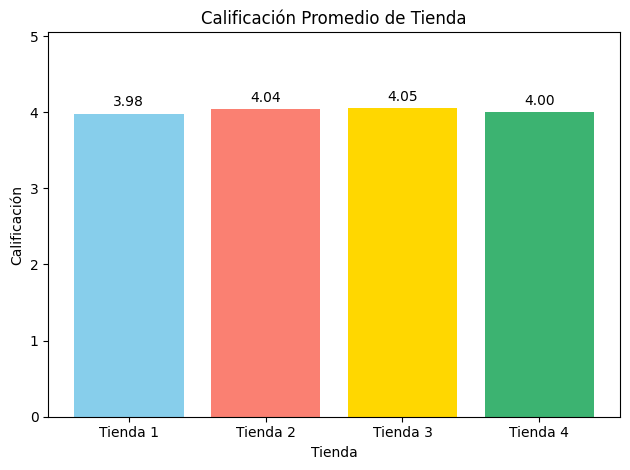

In [33]:
import matplotlib.pyplot as plt

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
califica = [calificacion, calificacion2, calificacion3, calificacion4]
colores = ['skyblue', 'salmon', 'gold', 'mediumseagreen']

plt.bar(nombres_tiendas, califica, color=colores)
plt.title('Calificación Promedio de Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación')

# Añadir valores encima de cada barra, redondeados
for i, v in enumerate(califica):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.ylim(0, max(califica) + 1)  # Asegura que las etiquetas entren bien
plt.tight_layout()
plt.show()


# 4. Productos más y menos vendidos

In [34]:
for i, df in enumerate([tienda, tienda2, tienda3, tienda4], start=1):
    print(f"\n🛍️ Tienda {i}")
    conteo = df['Producto'].value_counts()
    print("Top 5 productos más vendidos:")
    print(conteo.head())
    print("Top 5 productos menos vendidos:")
    print(conteo.tail())



🛍️ Tienda 1
Top 5 productos más vendidos:
Producto
Microondas          60
TV LED UHD 4K       60
Armario             60
Secadora de ropa    58
Mesa de noche       56
Name: count, dtype: int64
Top 5 productos menos vendidos:
Producto
Ciencia de datos con Python    39
Pandereta                      36
Olla de presión                35
Auriculares con micrófono      33
Celular ABXY                   33
Name: count, dtype: int64

🛍️ Tienda 2
Top 5 productos más vendidos:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Guitarra acústica            58
Pandereta                    58
Name: count, dtype: int64
Top 5 productos menos vendidos:
Producto
Auriculares        37
Sillón             35
Mesa de comedor    34
Impresora          34
Juego de mesa      32
Name: count, dtype: int64

🛍️ Tienda 3
Top 5 productos más vendidos:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche  

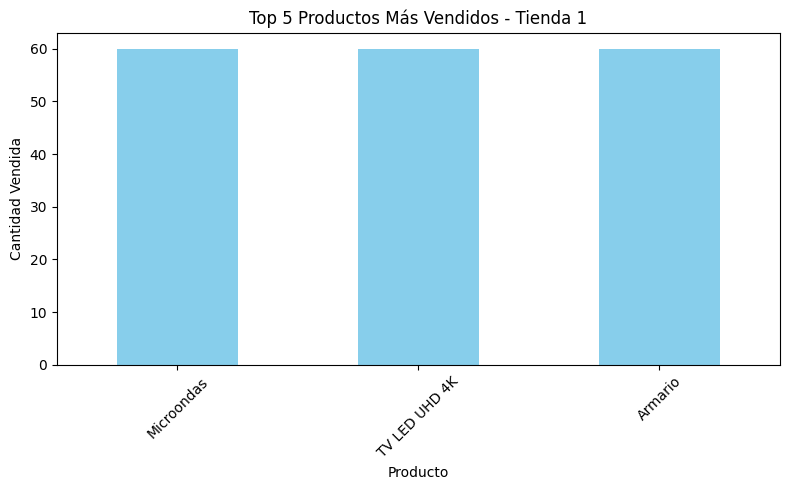

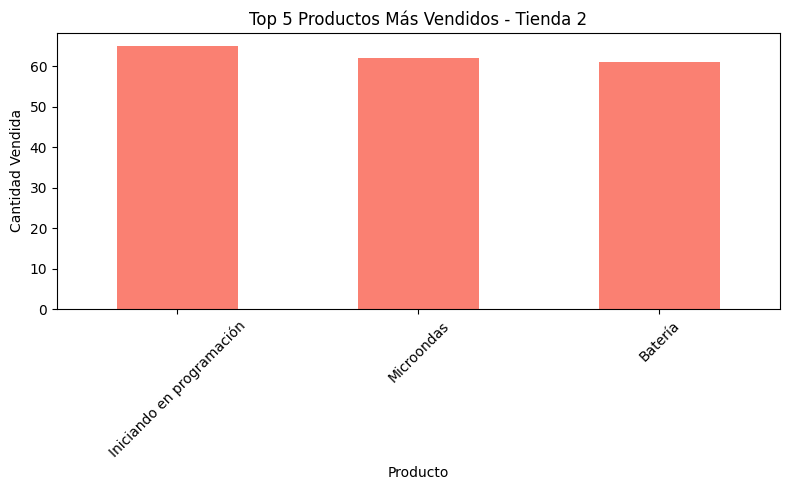

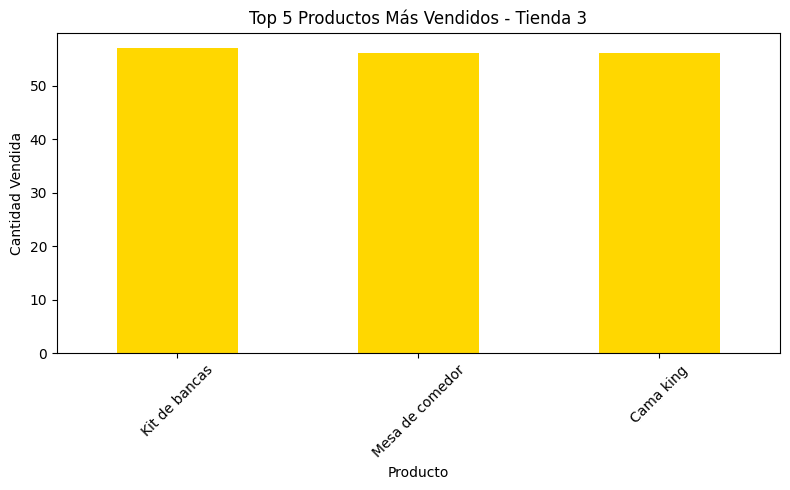

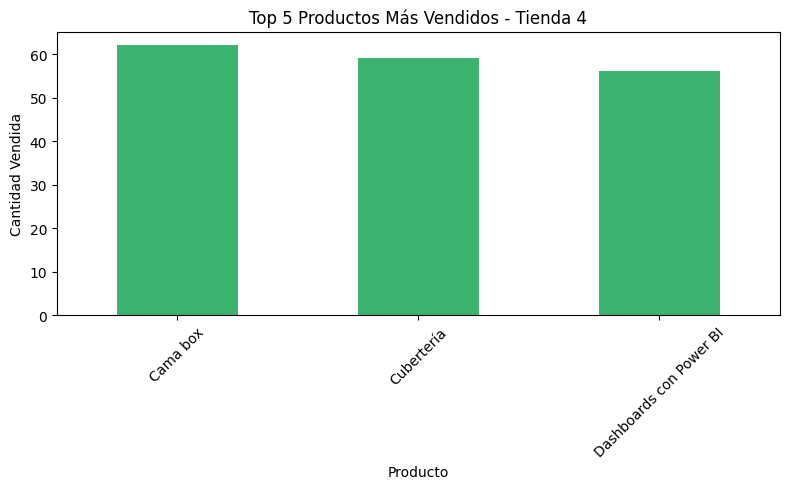

In [36]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
colores = ['skyblue', 'salmon', 'gold', 'mediumseagreen']

for i, df in enumerate(tiendas):
    top_productos = df['Producto'].value_counts().head(3)

    plt.figure(figsize=(8, 5))
    top_productos.plot(kind='bar', color=colores[i])
    plt.title(f'Top 5 Productos Más Vendidos - {nombres[i]}')
    plt.xlabel('Producto')
    plt.ylabel('Cantidad Vendida')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# 5. Envío promedio por tienda

In [40]:
costo = round(tienda['Costo de envío'].sum() / len(tienda), 2)
costo2 = round(tienda2['Costo de envío'].sum() / len(tienda2), 2)
costo3 = round(tienda3['Costo de envío'].sum() / len(tienda3), 2)
costo4 = round(tienda4['Costo de envío'].sum() / len(tienda4), 2)

print(costo)
print(costo2)
print(costo3)
print(costo4)


26018.61
25216.24
24805.68
23459.46


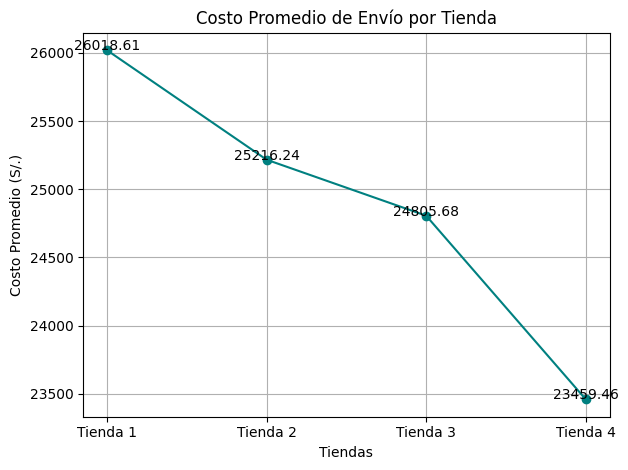

In [41]:
import matplotlib.pyplot as plt

nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
costos = [costo, costo2, costo3, costo4]

plt.plot(nombres_tiendas, costos, marker='o', linestyle='-', color='teal')
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tiendas')
plt.ylabel('Costo Promedio (S/.)')

for i, v in enumerate(costos):
    plt.text(i, v + 0.1, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.grid(True)
plt.show()


1089.5025
1056.8584
1039.503
983.0583


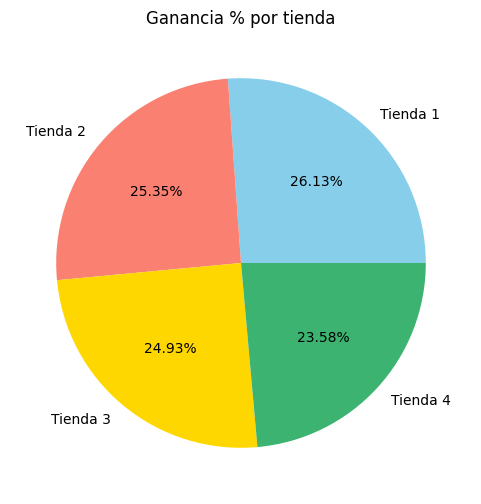

In [49]:
#analisis de ganancias

costo = tienda['Costo de envío'].sum()
costo2 = tienda2['Costo de envío'].sum()
costo3 = tienda3['Costo de envío'].sum()
costo4 = tienda4['Costo de envío'].sum()



VENTAS = tienda['Precio'].sum()
VENTAS2 = tienda2['Precio'].sum()
VENTAS3 = tienda3['Precio'].sum()
VENTAS4 = tienda4['Precio'].sum()



Profit_tienda = round(VENTAS - costo, 2)/1000000
Profit_tienda2 = round(VENTAS2 - costo2, 2)/1000000
Profit_tienda3 = round(VENTAS3 - costo3, 2)/1000000
profit_tienda4 = round(VENTAS4 - costo4, 2)/1000000

print(Profit_tienda)
print(Profit_tienda2)
print(Profit_tienda3)
print(profit_tienda4)

plt.figure(figsize=(6, 6))
plt.pie([Profit_tienda, Profit_tienda2, Profit_tienda3, profit_tienda4], labels=nombres_tiendas, autopct='%1.2f%%', colors=['skyblue', 'salmon', 'gold', 'mediumseagreen'])
plt.title('Ganancia % por tienda')
plt.show()

#Mapa de calor por ubicacion

In [52]:
import folium
from folium.plugins import HeatMap

data = tienda[['lat', 'lon']].dropna()

mapa = folium.Map(location=[data['lat'].mean(), data['lon'].mean()], zoom_start=12)

HeatMap(data[['lat', 'lon']].values).add_to(mapa)

mapa



#conclusiones del analisis

# Informe de Análisis de Tiendas
##Introducción
El presente informe tiene como propósito identificar cuál de las cuatro tiendas analizadas debe dejar de utilizarse como canal de ventas, debido a que no genera las ganancias necesarias para justificar su operación.
Para ello, se ha realizado un análisis comparativo utilizando variables clave como los productos más vendidos, las categorías con mayores ingresos, el costo promedio de envío y la calificación promedio de los clientes, entre otros.
Este análisis permitirá tomar una decisión fundamentada para optimizar los recursos y concentrar los esfuerzos de venta en las tiendas más rentables.

## Desarrollo

1. Ingreso total por cada tienda
Se analizaron las ventas totales por categoría de producto en cada tienda. Esto permite identificar las categorías que generan mayores ingresos y determinar si alguna tienda presenta un rendimiento significativamente bajo en este aspecto, de los cuales la tienda que mas genero ganacia fuen la 1 y la menos la 4.

2. Ventas por categoría de producto
Se analizaron las ventas totales por categoría de producto en cada tienda. Esto permite identificar las categorías que generan mayores ingresos, determinandose que son lo electronicos, electrodomesticos y muebles, lo que mas generan ganacias.

3. Calificación promedio por tienda
Las calificaciones otorgadas por los clientes reflejan su experiencia de compra. Se calcularon los promedios de calificación para comparar la calidad percibida del servicio en cada tienda, siendo la mas aceptada la tienda 3 y 2

4. Productos más vendidos y menos vendidos por tienda
Se identificaron los cinco productos más vendidos en cada tienda con base en la frecuencia de venta. Esto permite visualizar cuáles tiendas tienen mayor rotación de productos, lo cual es un indicador importante de rendimiento comercial.

5. Costo promedio de envío
El costo de envío puede impactar directamente las ganacias de cada tienda. Se calcularon los costos promedio para evaluar qué tan competitivas son las tiendas en este aspecto, siendo que la que mas se gasta en envios es la tienda uno y la menor la tienda 4.


6. Ganancias por cada tienda
las ganancias se calcularon restando total de ventas por tienda menos el precio de envio y se determio que la tienda 1 es la que mas genera ganacias y la menor es la tienda 4.


## Conclusión

La decision estuvo entre la tienda 4 y la 1 pero Luego de evaluar el comportamiento de ventas, ingresos por categoría, costos de envío y satisfacción del cliente, se concluye que la tienda 4  debe dejar de utilizarse como canal de venta, debido que pesar de que tiene un calificacion mayor del publico y tiene menor costo de envio que la tienda 1, esta tienda solo representa el  23.58% de las ganancias de la empresa y la tienda 1 representa el 26.13%. por lo tanto la tienda 1 es la que genera mayores ganancias monetarias para la empresa, mientras que la 4 es la que menos aporta, por lo tanto no puede seguir en funcionamiento.

